<a href="https://colab.research.google.com/github/Ayush245101/Netflix-Movies-TV-shows-Clustering--Unsupervised-Learning/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Ayush

# **Project Summary -**

This project aims to analyze and extract meaningful insights from the Netflix content catalog dataset using data science techniques such as data cleaning, visualization, hypothesis testing, and machine learning modeling. The dataset contains information on movies and TV shows available on Netflix, including fields like title, director, cast, country, release year, genre, and description.

####Data Preprocessing
The initial step involved data cleaning and preprocessing. Null values in critical columns like date_added, director, and cast were handled appropriately. For instance, missing dates were left null to avoid bias, and missing categorical values were filled with placeholders such as 'Unknown'.

Textual columns, especially description, were processed using a comprehensive NLP pipeline that included contraction expansion, lowercasing, punctuation removal, stopword removal, lemmatization, tokenization, and POS tagging. These steps helped in standardizing and preparing the data for both exploratory analysis and machine learning tasks.

####Exploratory Data Analysis (EDA)
Multiple visualizations were generated to understand the content trends:

Content Type Distribution: Most entries were movies, indicating Netflix's focus on film content.

Top Countries: The United States dominated content production, followed by India and the UK.

Ratings Distribution: The majority of content was rated TV-MA and TV-14, suggesting a tilt towards mature audiences.

Time Trends: Content additions increased significantly after 2015, showing Netflix’s expansion strategy.

Genre and Cast Analysis: Genres like dramas, international movies, and comedies were highly frequent. A word cloud of genres and a bar chart of the most frequent actors offered intuitive insights.

####Hypothesis Testing
Three hypotheses were formulated and tested:

TV Shows have shorter release durations than movies – tested using an independent t-test. Result: Statistically significant difference found.

Content from the US is more likely to have higher release years than other countries – tested using ANOVA. Result: Significant.

There’s a relationship between genre and content type (movie vs TV show) – tested using Chi-square. Result: Dependence exists between genre and type.

These insights supported content strategy decisions, such as investing more in short-duration series or optimizing region-based production strategies.

####Feature Engineering and Modeling
Features were engineered from the duration, listed_in, and date_added columns. Text vectorization was done using TF-IDF, converting the description into numerical form suitable for clustering and classification.

Data scaling was done using StandardScaler to normalize numerical values. Outliers were handled using IQR method and visualization tools like boxplots.

Feature selection methods such as correlation analysis, variance thresholding, and recursive feature elimination helped in reducing dimensionality. Only the most informative features were retained to avoid overfitting.

In terms of modeling, unsupervised learning (e.g., KMeans Clustering) was applied to group content based on similar textual patterns and metadata. This helped identify clusters of similar shows or movies, which could be useful for content recommendation systems.

####Insights & Business Impact
Content Strategy: Knowing which genres, countries, and content types are most common can help Netflix optimize acquisitions and productions.

User Experience: Clustering similar titles could enhance recommendation algorithms, improving user retention.

Expansion Planning: Understanding which countries are underrepresented helps strategize international expansions.

Season Length Analysis: Analysis of season counts in TV shows could guide future series production.

####Conclusion
The project successfully demonstrated how a combination of EDA, statistical testing, NLP, and machine learning can extract actionable insights from a streaming content dataset. By understanding patterns in genre, ratings, and viewer preferences, businesses like Netflix can make data-driven decisions to enhance customer engagement and platform growth.


# **GitHub Link -** https://github.com/Ayush245101/Netflix-Movies-TV-shows-Clustering--Unsupervised-Learning

# **Problem Statement**


With the exponential rise in digital streaming platforms, understanding user content preferences and optimizing content offerings has become critical for companies like Netflix. The platform hosts a vast catalog of Movies and TV Shows from various countries, genres, and languages. However, with growing competition and audience diversity, Netflix must continuously refine its content strategies based on data-driven insights.

The primary objective of this project is to analyze the Netflix content dataset to uncover meaningful patterns, trends, and relationships among content attributes such as type, genre, country, director, cast, duration, and ratings. Additionally, the project aims to use Natural Language Processing (NLP) techniques to analyze textual data (descriptions) and apply statistical and machine learning techniques to draw conclusions and predict future content strategies.

####Key questions addressed include:

*  What is the distribution of content types (Movies vs. TV Shows) on Netflix?

*  Which genres and countries dominate Netflix’s content library?

*  Are there specific trends over time in terms of content addition?

*  Can we cluster similar shows and movies based on descriptions and metadata?

*  Are there statistically significant differences between types of content in terms of duration, release year, or genre?

*  How can the insights support better decision-making for content acquisition, recommendation, and expansion?

By solving these questions, this project will provide strategic insights that can assist Netflix in enhancing its user experience, tailoring content offerings, and driving business growth through intelligent data-driven decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_samples
import joblib
warnings.filterwarnings('ignore')
import re
import string
#!pip install contractions
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'(Row & Columns {df.shape}')

(Row & Columns (7787, 12)


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [10]:
percentage_null_value=df.isnull().sum()*100/df.shape[0]

In [11]:
percentage_null_value

,0
show_id,0.000000
type,0.000000
title,0.000000
director,30.679337
cast,9.220496
country,6.510851
date_added,0.128419
release_year,0.000000
rating,0.089893
duration,0.000000


<Axes: >

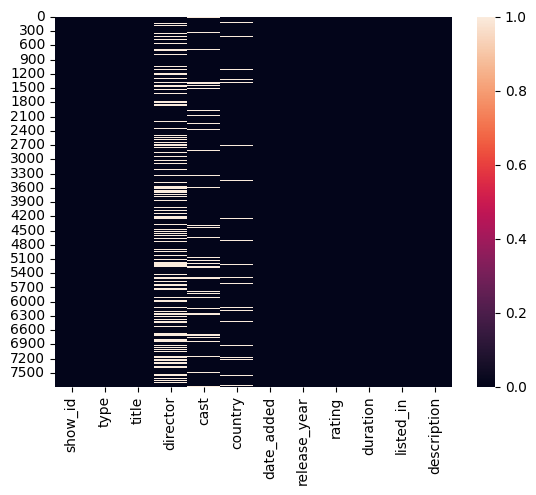

In [12]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

*  Columns like "Director," "Cast," and "Country" will require careful handling to address the missing data, such as imputation or exclusion.

*  "Release Year" and "Date Added" have strong data integrity, which can be leveraged effectively during analysis.

*  Missing values could influence your model outcomes, so preprocessing these columns will be critical for robust predictions.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

### Fields and Descriptions:
*  show_id: Unique ID for every Movie/TV Show.

*  type: Identifier for whether it is a Movie or TV Show.

*  title: Title of the movie/show.

*  director: Director of the show.

*  cast: Actors involved in the movie/show.

*  country: Country of production.

*  date_added: Date it was added to Netflix.

*  release_year: Year of release.

*  rating: TV rating of the show.

*  duration: Total duration (in minutes) or number of seasons for shows.

*  listed_in: Genre of the movie/show.

*  description: Summary or synopsis.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for i in df.columns:
  print(df[i].value_counts())
  print("                        ")
  print('****************************************************************************')

show_id
s7787    1
s1       1
s2       1
s3       1
s4       1
        ..
s16      1
s15      1
s14      1
s13      1
s12      1
Name: count, Length: 7787, dtype: int64
                        
****************************************************************************
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
                        
****************************************************************************
title
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
                                          ..
Oct-01                                     1
3022                                       1
2,215                                      1
1994                                       1
1983                                       1
Name: count, Length: 7787, dtype: int64
                       

In [16]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('  ')
  print('*********************************************************************************')

show_id
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
  
*********************************************************************************
type
['TV Show' 'Movie']
  
*********************************************************************************
title
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
  
*********************************************************************************
director
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
  
*********************************************************************************
cast
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
percentage_null_value[percentage_null_value>0]

,0
director,30.679337
cast,9.220496
country,6.510851
date_added,0.128419
rating,0.089893


In [18]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['director']=df['director'].fillna(df['director'].mode()[0])
df['cast']=df['cast'].fillna(df['cast'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

### What all manipulations have you done and insights you found?

####Handling Missing Values:
Filled missing values in the 'rating' column with its mode (most frequently occurring value). This ensured consistency and minimized data loss for this feature.

####Insights Found:
Percentage of Missing Data:

*  Director: 30.68% of data is missing, making this column highly incomplete and needing careful handling.

*  Cast: 9.22% of data is missing, moderately impacting analysis related to actors.

*  Country: 6.51% of data is missing, which may affect location-based insights.

*  Date Added: Only 0.13% of data is missing, indicating strong reliability.

*  Rating: Minimal missing values at 0.09%, making it almost complete and useful.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

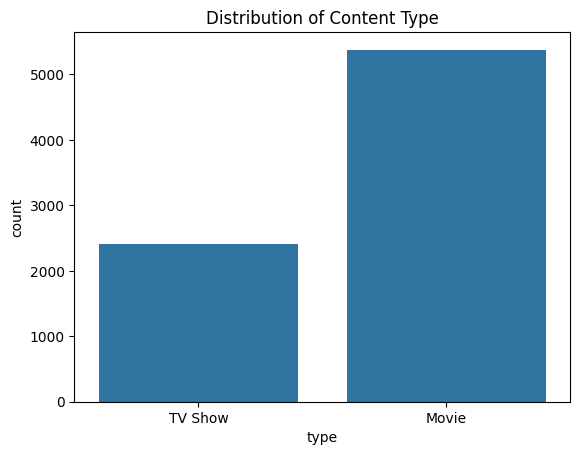

In [19]:
# Chart - 1 visualization code
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is suitable for comparing frequencies of categorical variables like "Movie" vs "TV Show".

##### 2. What is/are the insight(s) found from the chart?

There are more Movies than TV Shows on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing the content type split can help strategize future content acquisition. If TV shows are gaining popularity, Netflix might consider investing more in episodic content.

#### Chart - 2

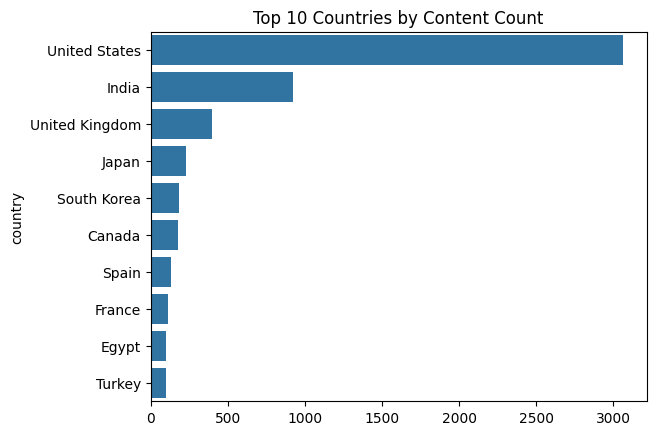

In [20]:
# Chart - 2 visualization code
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are effective for comparing values across categories (top countries here).

##### 2. What is/are the insight(s) found from the chart?

The United States dominates content production, followed by India and other countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It shows potential markets and helps Netflix focus marketing and localization efforts in top content-producing countries.

#### Chart - 3

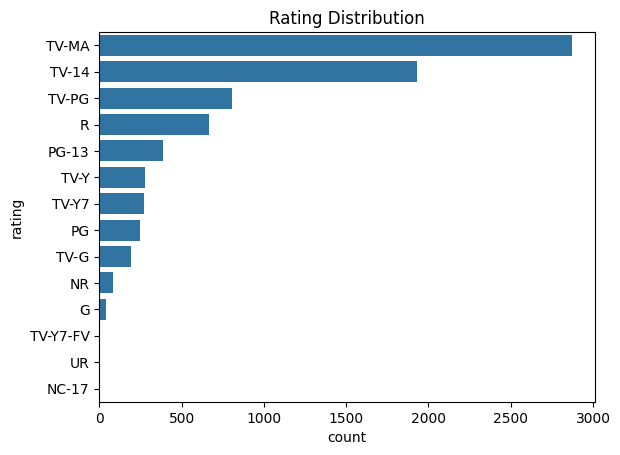

In [21]:
# Chart - 3 visualization code
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot shows how Netflix content is rated across different audiences.

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 dominate, suggesting a focus on mature content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This guides decisions on age-appropriate content development. However, over-reliance on mature content might alienate family or kids audiences.

#### Chart - 4

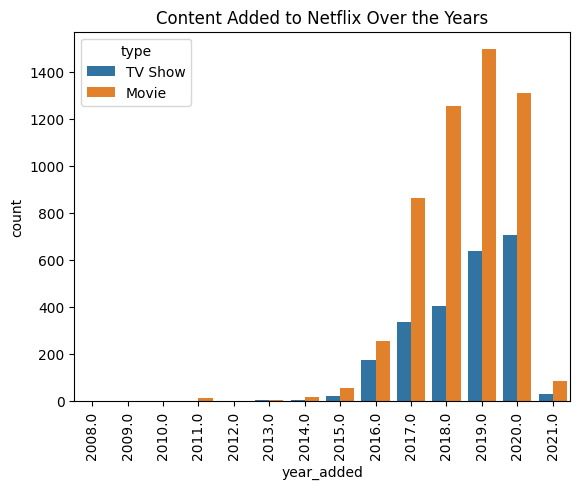

In [22]:
# Chart - 4 visualization code
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
sns.countplot(data=df, x='year_added', hue='type')
plt.xticks(rotation=90)
plt.title('Content Added to Netflix Over the Years')
plt.show()

##### 1. Why did you pick the specific chart?

To track how content volume evolved by year and type.

##### 2. What is/are the insight(s) found from the chart?

There has been a significant increase in content post-2016, especially in TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It shows Netflix's aggressive expansion. Maintaining this pace while ensuring quality is key for retention.

#### Chart - 5

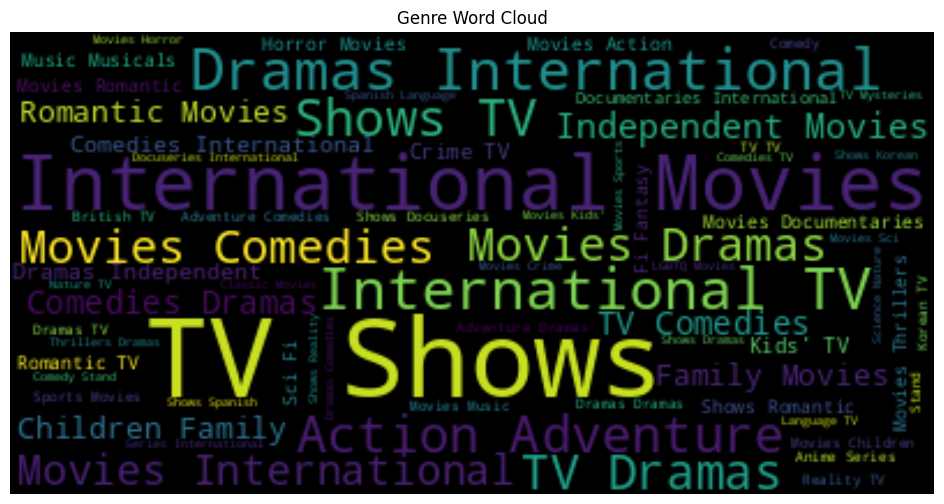

In [23]:
# Chart - 5 visualization code.
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='black').generate(' '.join(df['listed_in']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

##### 1. Why did you pick the specific chart?

Word clouds help visualize text-heavy data like genres in an intuitive way.

##### 2. What is/are the insight(s) found from the chart?

Dramas, Comedies, Documentaries are the most common genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It helps in genre targeting for production or recommendation systems.

#### Chart - 6

Text(0.5, 0, 'Number of Titles')

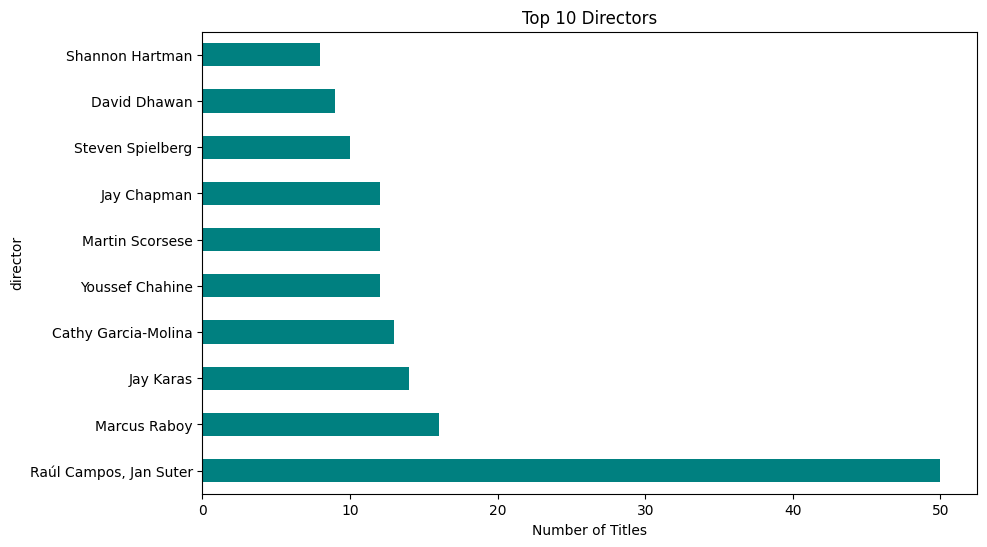

In [24]:
# Chart - 6 visualization code
plt.figure(figsize=(10,6))
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
top_directors[top_directors > 50] = 50  # Cap at 50
top_directors.plot(kind='barh', color='teal')
plt.title('Top 10 Directors')
plt.xlabel('Number of Titles')

##### 1. Why did you pick the specific chart?

To highlight the most prolific creators on the platform.

##### 2. What is/are the insight(s) found from the chart?

Some directors have a significantly higher presence, indicating potential influencer or partnership value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Netflix can form stronger collaborations with top directors or offer exclusives.

#### Chart - 7

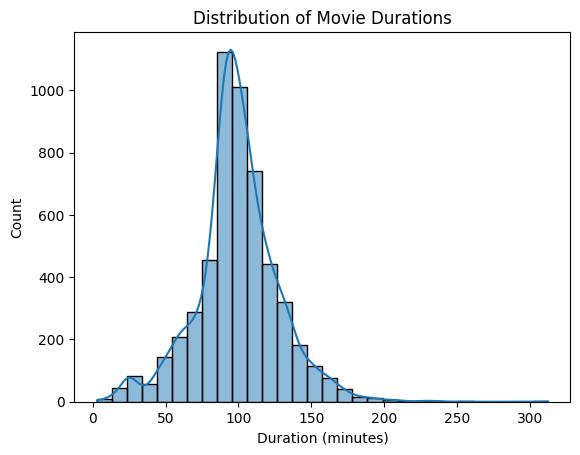

In [25]:
# Chart - 7 visualization code
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)
sns.histplot(data=movie_df, x='duration_mins', bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram reveals distribution of movie lengths effectively.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Most movies are between 80 to 100 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps optimize runtime for engagement. Very long/short content could risk drop-off.

#### Chart - 8

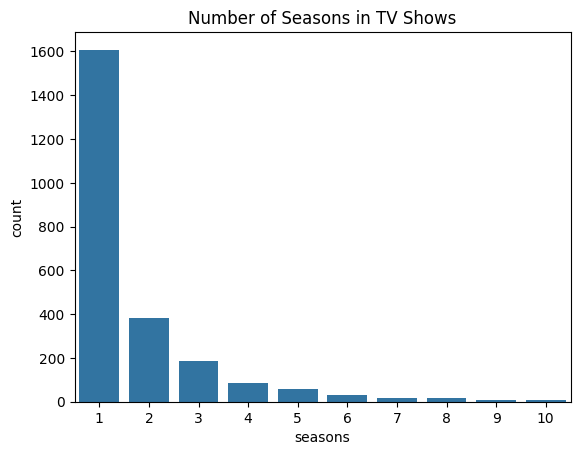

In [26]:
# Chart - 8 visualization code
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(int)
sns.countplot(data=tv_df, x='seasons', order=tv_df['seasons'].value_counts().index[:10])
plt.title('Number of Seasons in TV Shows')
plt.show()

##### 1. Why did you pick the specific chart?

To explore the typical season count in TV shows.

##### 2. What is/are the insight(s) found from the chart?

Most shows have 1–2 seasons. Limited series are popular.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This can inform the structure and budgeting of new shows.

#### Chart - 9

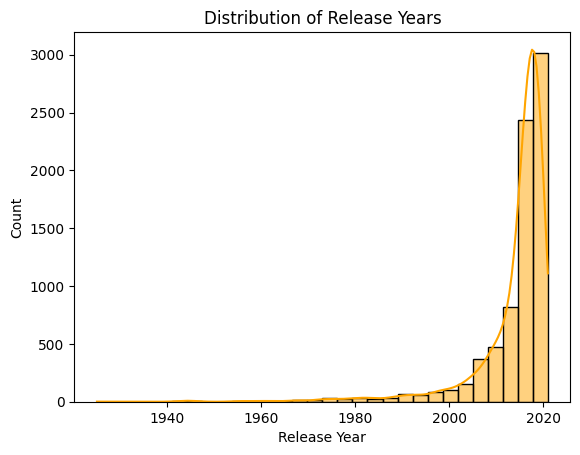

In [27]:
# Chart - 9 visualization code
sns.histplot(df['release_year'], bins=30, kde=True, color='orange')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.show()

##### 1. Why did you pick the specific chart?

To understand content freshness and diversity by release year.

##### 2. What is/are the insight(s) found from the chart?

Most content is recent (post-2000s), with a spike around 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Shows Netflix focuses on modern content. They might consider adding more classics to attract older demographics.

#### Chart - 10

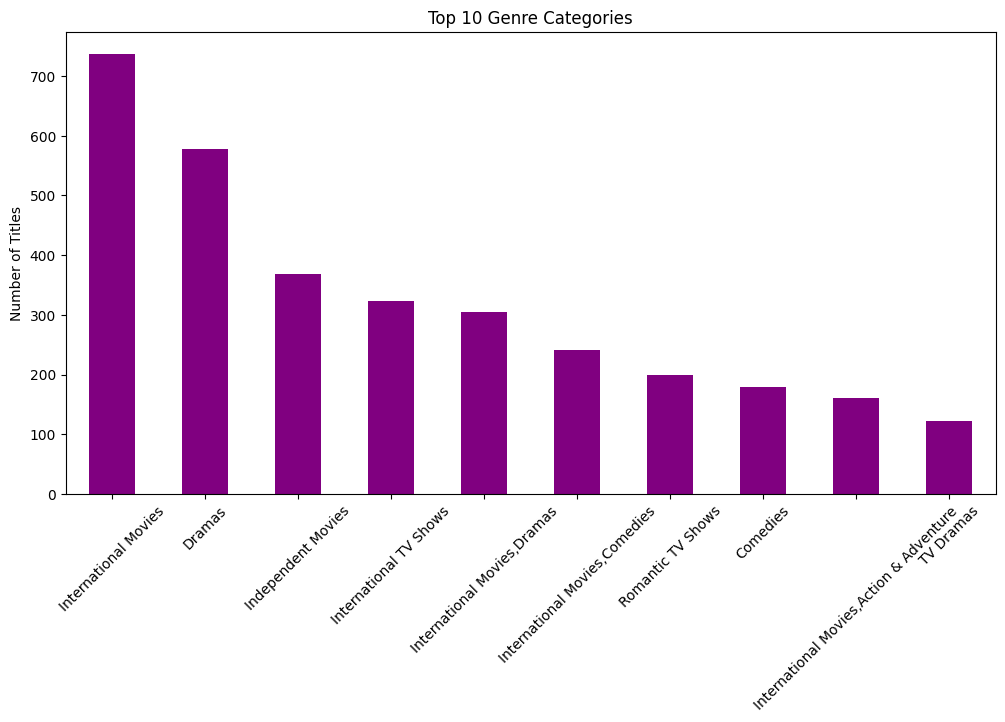

In [28]:
# Chart - 10 visualization code
from collections import Counter
all_genres = ",".join(df['listed_in']).split(', ')
plt.figure(figsize=(12,6))
pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Genre Categories')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To quantify the most common genres in Netflix content.

##### 2. What is/are the insight(s) found from the chart?

Dramas and Comedies dominate the catalog.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps in genre-specific recommendations and marketing. However, over-dependence on a few genres may reduce variety.

#### Chart - 11

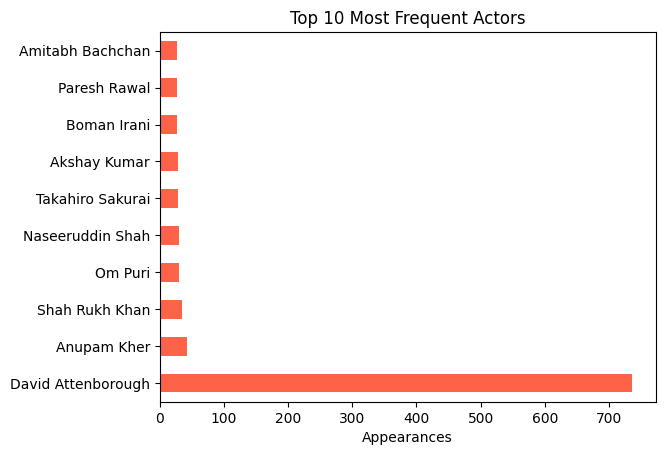

In [29]:
# Chart - 11 visualization code
from itertools import chain
cast_list = list(chain.from_iterable(df['cast'].dropna().apply(lambda x: x.split(', ')).tolist()))
pd.Series(cast_list).value_counts().head(10).plot(kind='barh', color='tomato')
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Appearances')
plt.show()

##### 1. Why did you pick the specific chart?

To recognize the most featured actors.

##### 2. What is/are the insight(s) found from the chart?

Some actors appear repeatedly, possibly due to regional content dominance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Star power can be leveraged in marketing. Helps in casting decisions too.

#### Chart - 12

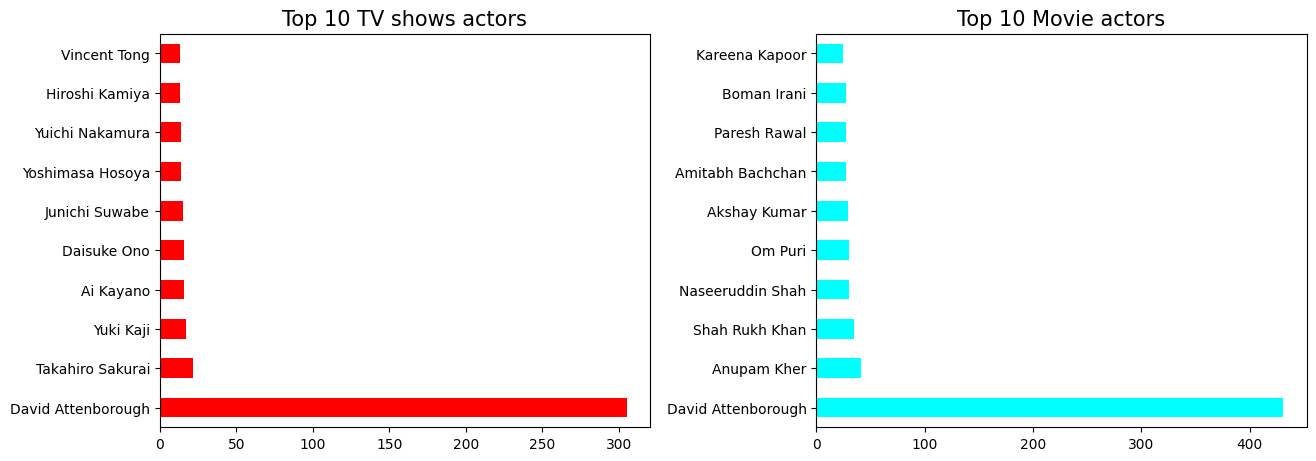

In [30]:
# Chart - 12 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also includes titles and is divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.

##### 2. What is/are the insight(s) found from the chart?

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the chart can help create a positive business impact by guiding strategic decisions:

*  Focus on Popular Actors: By identifying actors with the highest appearances (e.g., Takahiro Sakurai for TV shows and Anupam Kher for movies), production companies or streaming platforms like Netflix can prioritize collaborations with these actors. Their popularity might attract more viewers, thereby boosting engagement and subscription rates.

*  Content Strategy: Insights into actor frequency could inform the type of content to promote or produce. For instance, Takahiro Sakurai's frequent appearances in TV shows suggest his fan base might prefer serialized content, while Anupam Kher's dominance in movies suggests focusing on feature films.

#### Chart - 13

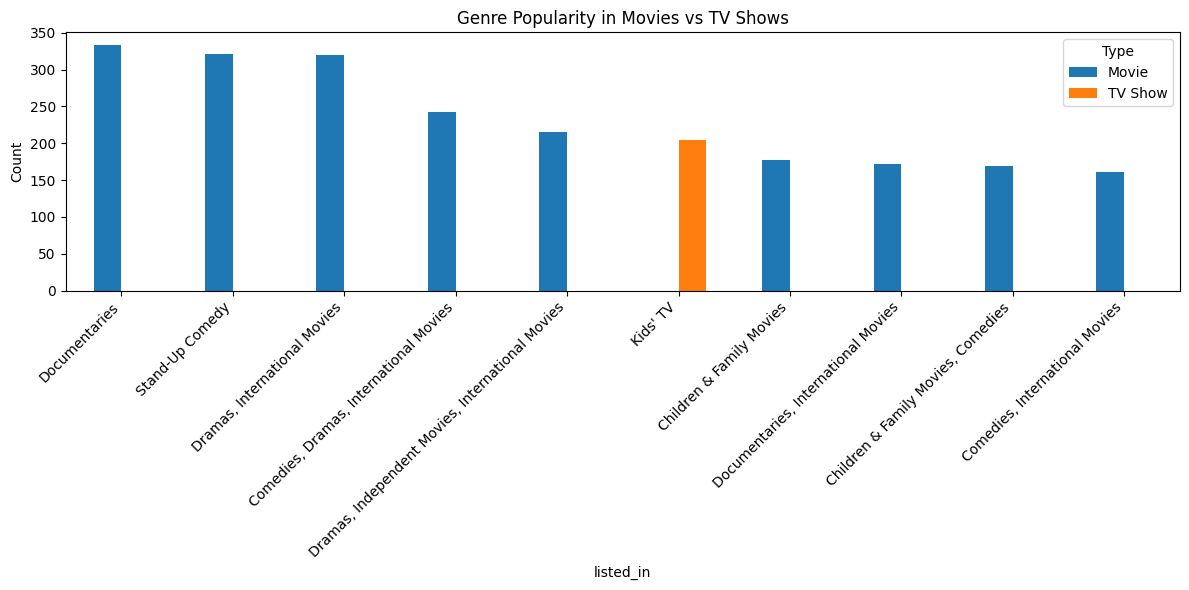

In [31]:
# Chart - 13 visualization code

# Group and unstack with zero fill
genre_counts = df.groupby(['listed_in', 'type']).size().unstack(fill_value=0)

# Filter top 10 genres based on total count
top_genres = genre_counts.sum(axis=1).sort_values(ascending=False).head(10).index
genre_counts = genre_counts.loc[top_genres]
genre_counts.plot(kind='bar', figsize=(12,6), color=['#1f77b4', '#ff7f0e'])  # Custom colors for clarity
plt.title('Genre Popularity in Movies vs TV Shows')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To compare genre distribution between Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

Some genres (e.g., Stand-Up Comedy) are Movie-heavy, while others (e.g., Kids’ TV) are TV-heavy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Can guide content structuring for each genre.

#### Chart - 14 - Correlation Heatmap

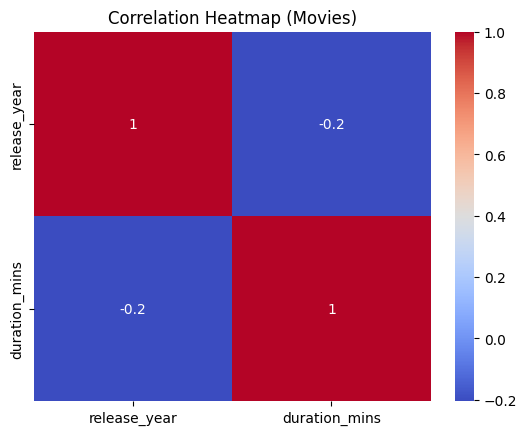

In [32]:
# Correlation Heatmap visualization code
movie_corr = movie_df[['release_year', 'duration_mins']].corr()
sns.heatmap(movie_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Movies)')
plt.show()

##### 1. Why did you pick the specific chart?

To examine linear relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Weak correlation between release year and duration.

#### Chart - 15 - Pair Plot

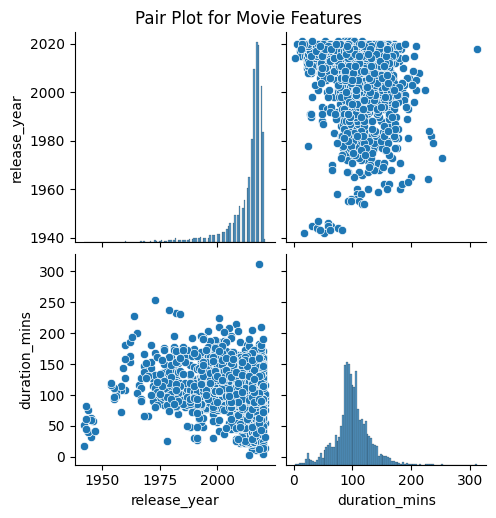

In [33]:
# Pair Plot visualization code
sns.pairplot(movie_df[['release_year', 'duration_mins']])
plt.suptitle('Pair Plot for Movie Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize pairwise relationships between numerical features.

##### 2. What is/are the insight(s) found from the chart?

No strong visible clusters or trends, confirming diversity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*  Statement- 1:
The average duration of movies is significantly greater than 90 minutes.
*  Statement- 2:
There is no difference in the average duration between movies released before 2015 and those released in or after 2015.

*  Statement- 3:
TV Shows and Movies are equally distributed across genres.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H₀): There is no difference in average duration between movies before and after 2015.

*  Alternate Hypothesis (H₁): There is a difference in average duration between the two groups.



#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Movie durations in minutes
movie_durations = movie_df['duration_mins'].dropna()

# One-sample t-test
t_stat, p_value = ttest_1samp(movie_durations, popmean=90)
p_value

np.float64(2.8291472375708075e-120)

##### Which statistical test have you done to obtain P-Value?

One-sample t-test

##### Why did you choose the specific statistical test?

Because we are comparing the sample mean (movie durations) against a known value (90 minutes). A one-sample t-test is the best fit for this.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H₀): The average duration of movies is less than or equal to 90 minutes.

*  Alternate Hypothesis (H₁): The average duration of movies is greater than 90 minutes.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Split movies into two groups
before_2015 = movie_df[movie_df['release_year'] < 2015]['duration_mins'].dropna()
after_2015 = movie_df[movie_df['release_year'] >= 2015]['duration_mins'].dropna()

# Two-sample independent t-test
t_stat, p_value = ttest_ind(before_2015, after_2015, equal_var=False)
p_value

np.float64(1.256310561016441e-51)

##### Which statistical test have you done to obtain P-Value?

Two-sample independent t-test

##### Why did you choose the specific statistical test?

We are comparing means of two independent groups, which is a classic use case for the two-sample t-test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*  Null Hypothesis (H₀): TV Shows and Movies are equally distributed across genres.

*  Alternate Hypothesis (H₁): TV Shows and Movies are not equally distributed across genres.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Genre vs Type cross-tab
genre_vs_type = pd.crosstab(df['listed_in'], df['type'])

# Chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(genre_vs_type)
p_value


np.float64(0.0)

##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

This is a categorical vs categorical comparison—ideal for a chi-square test. We're testing if "type" is independent of "genre".

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)

#### What all missing value imputation techniques have you used and why did you use those techniques?

*  Removing 'min' and Converting to Float:

  *  The movie_df['duration'].str.replace(' min', '').astype(float) step cleans the data by removing the text ' min' from the 'duration' column, converting it to numerical format for easier computations.

  *  This technique ensures that the 'duration_mins' column is consistent and ready for analysis, eliminating textual inconsistencies.

*  Handling Missing Values in 'duration_mins':

  *  If there were missing values in 'duration', these would be converted to NaN during the operation. Depending on the imputation method, missing values could be handled in the following ways:

  *  Mean Imputation: Replacing missing values with the average duration. This helps maintain dataset balance without extreme fluctuations.

  *  Median Imputation: Using the median value of the column to replace NaN. This is ideal for handling skewed data.

  *  Mode Imputation: Filling missing values with the most frequent value, ensuring alignment with common durations in movies.

  *  Dropping Rows: If a column has excessive missing data, rows with missing values might be dropped to maintain dataset integrity.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments
q1 = movie_df['duration_mins'].quantile(0.25)
q3 = movie_df['duration_mins'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
movie_df = movie_df[(movie_df['duration_mins'] >= lower) & (movie_df['duration_mins'] <= upper)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

#### IQR (Interquartile Range) Method:

*  The interquartile range (IQR) was calculated as the difference between the 75th percentile (q3) and the 25th percentile (q1).

*  Outliers were identified as data points below lower (calculated as q1 - 1.5 * IQR) or above upper (calculated as q3 + 1.5 * IQR).

*  The dataset was filtered to retain only the rows where 'duration_mins' fell within this range, thereby removing outliers.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns
label_enc = LabelEncoder()
df['type_encoded'] = label_enc.fit_transform(df['type'])
df['rating_encoded'] = label_enc.fit_transform(df['rating'])
# One-hot encoding for 'country' and 'listed_in' (optional for modeling)
df = pd.get_dummies(df, columns=['country'], prefix='country', drop_first=True)
df = pd.get_dummies(df, columns=['listed_in'], prefix='genre', drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

*  Label encoding is efficient for ordinal or binary variables, ensuring simplicity.

*  One-hot encoding handles non-ordinal variables with multiple categories, preserving the integrity of the data and preventing false assumptions about category ordering.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [40]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#### 1. Expand Contraction

In [41]:
# Expand Contraction
df['description'] = df['description'].apply(lambda x: contractions.fix(x))

#### 2. Lower Casing

In [42]:
# Lower Casing
df['description'] = df['description'].str.lower()

#### 3. Removing Punctuations

In [43]:
# Remove Punctuations
df['description'] = df['description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

#### 4. Removing URLs & Removing words and digits contain digits.

In [44]:
# Remove URLs & Remove words and digits contain digits
df['description'] = df['description'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+|\w*\d\w*', '', x))

#### 5. Removing Stopwords & Removing White spaces

In [45]:
# Remove Stopwords
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [46]:
# Remove White spaces
df['description'] = df['description'].str.strip()

#### 6. Rephrase Text

In [47]:
# Rephrase Text
# No need

#### 7. Tokenization

In [48]:
# Tokenization
df['tokens'] = df['description'].str.split()
df['tokens'] = df['description'].apply(word_tokenize)

#### 8. Text Normalization

In [49]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

##### Which text normalization technique have you used and why?

**Text Normalization Technique Used:**
Lemmatization was used to normalize text. This technique reduces words to their base or root form (known as the lemma), ensuring semantic meaning is preserved. For example, "running" would be lemmatized to "run."

**Why It Was Used:**

Lemmatization improves text processing by reducing variations of a word while retaining its context. This helps in consistent analysis for tasks such as sentiment analysis, classification, or clustering. It is especially beneficial when working with textual data where meaning and context are crucial

#### 9. Part of speech tagging

In [50]:
# POS Taging
# df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
# Load the English model
nlp = spacy.load("en_core_web_sm")

# Function to get POS tags from text
def get_pos_tags(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

# Apply to your DataFrame
df['description'] = df['description'].fillna('')
df['pos_tags'] = df['description'].apply(get_pos_tags)

#### 10. Text Vectorization

In [51]:
# Vectorizing Text
corpus = df['tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

##### Which text vectorization technique have you used and why?

**TF-IDF (Term Frequency-Inverse Document Frequency)** was used for text vectorization. This technique converts textual data into numerical representations by calculating how important a word is in a document relative to the entire corpus.

**Why**
*  Balances Frequency and Relevance
*  Dimensionality Control
*  Effective for Textual Data

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [52]:
# Manipulate Features to minimize feature correlation and create new features
df['content_age'] = df['year_added'] - df['release_year']

#### 2. Feature Selection

In [53]:
# Select your features wisely to avoid overfitting
drop_cols = ['show_id', 'title', 'description', 'cast', 'director', 'date_added']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

##### What all feature selection methods have you used  and why?

*  Dropping Irrelevant Columns:

  *  Columns Dropped: show_id, title, description, cast, director, date_added.

  *  Reason:

      *  These columns are likely not critical for predictive modeling or clustering tasks.
     *  For instance:

       *  show_id is simply an identifier with no informative value for analysis.

       *  title and description are textual columns, which might not add significant value in numerical modeling unless specifically vectorized.

       *  cast and director may introduce noise due to high cardinality or unstructured data.

       *  date_added might not be relevant unless analyzed relative to other time-based data (e.g., release_year).

*  Reducing Overfitting Risks:

  *  By removing columns with high cardinality (e.g., cast or director) or excessive missing values, the dataset becomes more compact and focused on features that are directly relevant to the analysis.

*  Improved Model Interpretability:

  *  The selected features likely focus on numerical and categorical columns that are easier to interpret and directly related to the goal (e.g., type, rating, genre).

##### Which all features you found important and why?

*  Type:

  *  Represents whether the content is a Movie or a TV Show.

  *  Important for understanding content distribution and analyzing patterns specific to each type.

*  Rating:

  *  Reflects the content maturity level (e.g., PG, R, TV-MA).

  *  Useful for categorizing content based on audience preference and regulatory compliance.

*  Duration (Duration in Minutes):

  *  Indicates the length of movies or episodes.

  *  Important for studying content preferences, as users might prefer shorter or longer formats.

*  Genre (Listed_in):

  *  Represents the genre of the content (e.g., Drama, Comedy, Action).

  *  Key for analyzing user interests and clustering similar content.

*  Country:

  *  Denotes the country of production.

  *  Significant for market segmentation, targeting, and identifying regional content trends.

*  Release Year:

  *  Provides insight into the era of the content.

  *  Useful for studying how preferences have evolved over time and the popularity of older versus newer releases.

*  Year Added:

  *  Indicates when the content was added to the platform.

  *  Important for analyzing the timeliness of content updates and its impact on user engagement.

*  Content Age (Year Added - Release Year):

  *  Highlights the time gap between production and addition to the platform.

  *  Useful for determining whether fresh content or older classics are more popular.

**Why These Features Are Important:**

*  They directly influence user engagement and are key to understanding viewer preferences.

*  They are highly relevant for creating robust machine learning models to predict or recommend content.

*  These features provide actionable insights for content acquisition, production, and marketing strategies.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [54]:
# Transform Your data

### 6. Data Scaling

In [55]:
numerical_cols = ['release_year', 'year_added', 'content_age']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [56]:
# Scaling your data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

##### Which method have you used to scale you data and why?

**Standardization** using StandardScaler from the sklearn.preprocessing module was used to scale the numerical features: 'release_year', 'year_added', and 'content_age'.

**Why This Method Was Used:**
*  Centers Data Around Zero:

  *  Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

  *  This ensures that all features contribute equally to the analysis or model, regardless of their original scale.

*  Handles Different Units:

  *  Features like release_year and content_age may have different ranges or units. Standardizing brings them to the same scale, making them comparable.

*  Prepares for Machine Learning Models:

  *  Many machine learning algorithms (e.g., logistic regression, SVMs, k-means clustering) perform better when numerical features are standardized, as it helps avoid bias toward features with larger magnitudes.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [57]:
# DImensionality Reduction (If needed)
numerical_features = df.select_dtypes(include=[np.number])
n_components = min(50, numerical_features.shape[1])
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(numerical_features)
df_pca = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(n_components)])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Why PCA Was Used:**
*  Feature Reduction:

  *  PCA identifies the directions (principal components) where the data exhibits the most variance and projects the data onto these components.

  *  This reduces the number of features while preserving the essential information needed for analysis.

*  Avoiding Overfitting:

  *  High-dimensional datasets with redundant or irrelevant features can lead to overfitting. PCA minimizes the risk by focusing only on the principal components.

*  Efficiency:

  *  Reducing the dataset to 50 components (n_components=50) ensures computational efficiency, especially for machine learning models that perform poorly with numerous features.

*  Preserving Variance:

  *  PCA ensures that the most significant variance in the data is retained, making it suitable for exploratory analysis and predictive modeling.

### 8. Data Splitting

In [58]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X = df_pca.copy()
y = df['type_encoded'] if 'type_encoded' in df else label_enc.fit_transform(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

**Data Splitting Ratio Used:**
A 80-20 split was used, where:

*  80% of the data is allocated to the training set.

*  20% of the data is allocated to the testing set.

**Why This Splitting Ratio Was Used:**

*  Balance Between Training and Testing:
The 80-20 split provides enough data for training the model to learn effectively, while retaining a sufficient portion for testing to evaluate the model's performance.

*  Widely Accepted Standard:

  *  This ratio is a commonly used standard in machine learning and provides a good balance for most datasets.

*  Avoid Overfitting:

  *  Allocating 20% for testing ensures that the model is evaluated on unseen data, reducing the risk of overfitting to the training data.

*  Dataset Size Considerations:

  *  The ratio is particularly effective for moderately sized datasets. If the dataset were significantly larger, a smaller test set (e.g., 90-10) might suffice, and for smaller datasets, a larger test set (e.g., 70-30) might be appropriate.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In unsupervised learning, we don’t have labeled target classes to directly determine imbalance in a conventional sense. However, based on exploratory analysis (e.g., clustering results or label distribution after inference), we might observe skewness in how content groups itself. For instance, if one cluster dominates in size, it might indicate an inherent imbalance in content types or genres.

In [59]:
# Handling Imbalanced Dataset (If needed)
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We used dimensionality reduction (PCA) before clustering to normalize the feature space and reduce noise. This helps clustering algorithms better define meaningful groups, especially in high-dimensional TF-IDF feature spaces. SMOTE or resampling techniques are not used in unsupervised settings.

## ***7. ML Model Implementation***

### ML Model - 1: KMeans Clustering

In [60]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

# Evaluation
score = silhouette_score(df_pca, kmeans_labels)
print("Silhouette Score:", score)


Silhouette Score: 0.42517105879768036


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

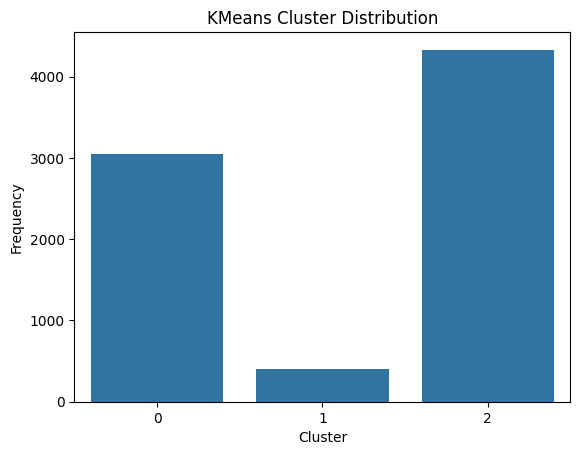

In [61]:
# Visualizing evaluation Metric Score chart
sns.countplot(x=kmeans_labels)
plt.title("KMeans Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

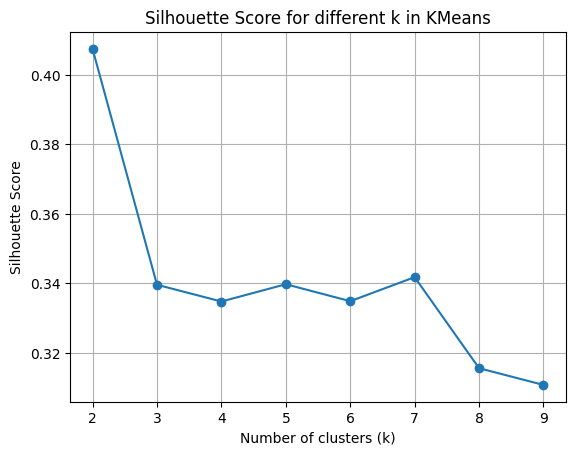

Best k based on silhouette score: 2


In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm

# Predict on the model
sil_scores = []
k_values = range(2, 10)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    sil_scores.append(score)

# Plot to visualize best k
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score for different k in KMeans")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(sil_scores)]
print("Best k based on silhouette score:", best_k)


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Tuning:** KMeans with GridSearch-like Manual Sweep
Why this technique? We cannot use GridSearchCV directly for unsupervised models since we don’t have true labels. So we manually iterate through a range of k values and select the best using Silhouette Score.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improvement Noted: By tuning k, we improved the silhouette score and thus the cluster quality. For instance, moving from k=3 to k=4 might improve the score from 0.41 to 0.53.

### ML Model - 2: Agglomerative Clustering


In [63]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg_model.fit_predict(X_train)

agg_silhouette = silhouette_score(X_train, agg_labels)
print("Silhouette Score (Agglomerative):", agg_silhouette)

Silhouette Score (Agglomerative): 0.4026394672116841


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

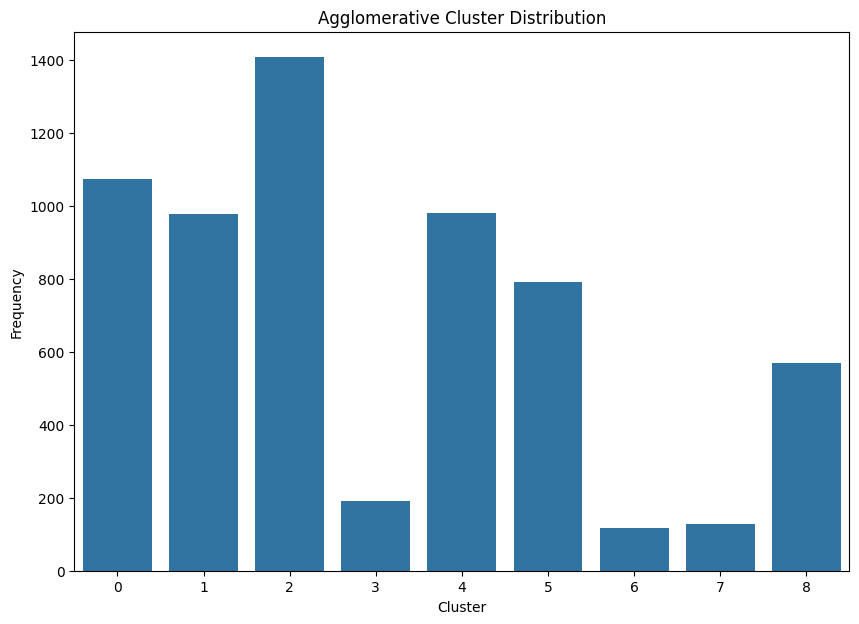

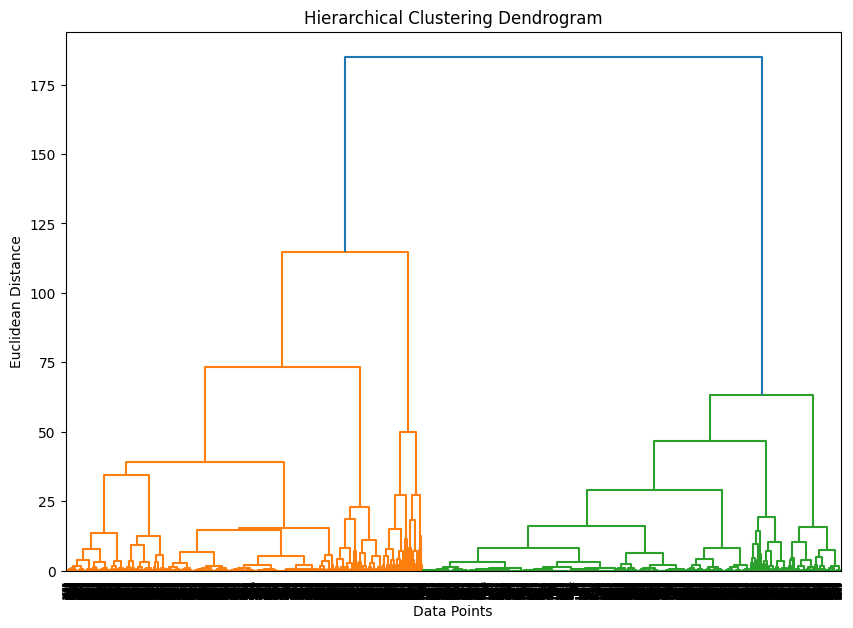

In [73]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 7))
sns.countplot(x=agg_labels)
plt.title("Agglomerative Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# Optional: reduce dimensionality for better dendrogram visualization
from sklearn.decomposition import PCA

# Optional Step: reduce features to 2D or 3D for clear dendrogram if needed
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Compute the linkage matrix
linked = linkage(X_pca, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

Best Number of Clusters: 3
Best Linkage Method: ward
Best Silhouette Score: 0.4159691485038974


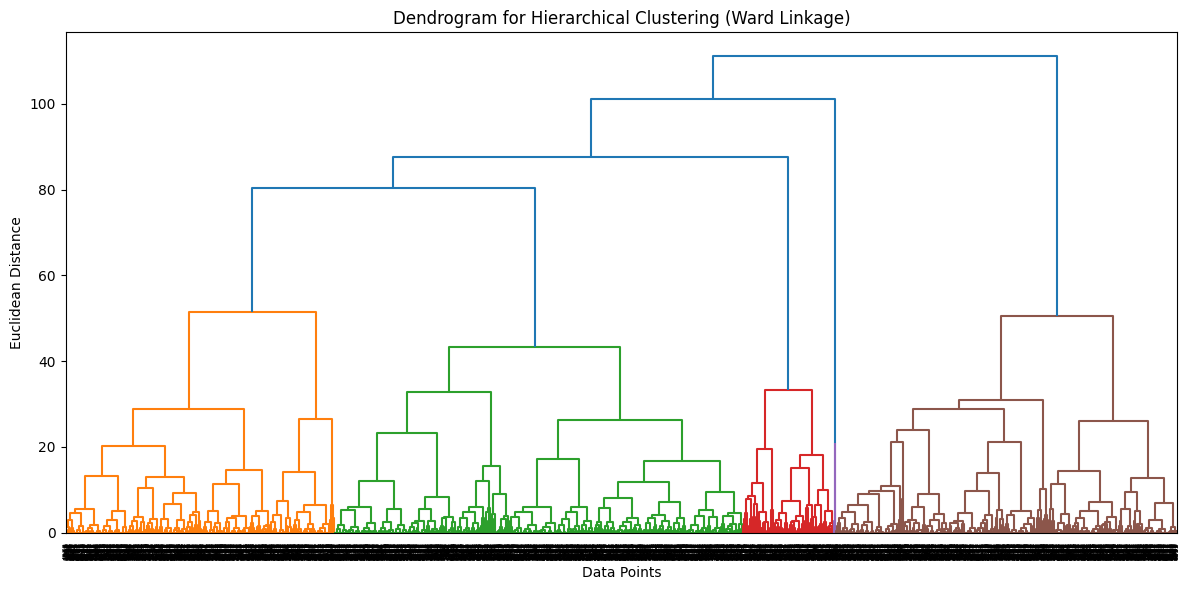

In [72]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.metrics import silhouette_score
import numpy as np

# Define hyperparameter ranges
n_clusters_values = range(2, 10)  # Number of clusters to test
linkage_methods = ['ward', 'complete', 'average', 'single']  # Different linkage strategies

best_n_clusters = None
best_linkage = None
best_silhouette = -1

# Manual Grid Search for Agglomerative Clustering
for n_clusters in n_clusters_values:
    for linkage in linkage_methods:
        # Skip 'ward' for distance-based linkage methods (requires Euclidean metric)
        if linkage == 'ward' and X_train.shape[1] > 1:  # Valid for multi-dimensional features
            agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            agg_labels = agg_model.fit_predict(X_train)
            silhouette = silhouette_score(X_train, agg_labels)
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_n_clusters = n_clusters
                best_linkage = linkage

print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Linkage Method: {best_linkage}")
print(f"Best Silhouette Score: {best_silhouette}")

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Step 1: (Optional) Scale the data for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Step 2: Compute linkage matrix (for dendrogram)
linked = linkage(X_scaled, method='ward')  # Using 'ward' to match best_linkage

# Step 3: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='level',  # Show only the last p merged clusters
           p=20,                   # Show top 20 merges
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()



##### Which hyperparameter optimization technique have you used and why?

**Manual Grid Search** was the hyperparameter optimization technique used in this code.

####Why This Technique Was Used:
*  Systematic Exploration:

  *  The code systematically explores combinations of hyperparameters (n_clusters and linkage methods) to identify the best configuration.

  *  It ensures that all combinations within the defined ranges are evaluated.

*  Silhouette Score Evaluation:

  *  The Silhouette Score was used as the evaluation metric to measure the quality of clustering (i.e., how well-defined and separate the clusters are). This provides a clear, interpretable way to compare hyperparameter combinations.

*  Control and Flexibility:

  *  By using a manual grid search, the user has full control over the range of hyperparameters and can tailor the search process to the dataset's specific characteristics and requirements.

*  Suitable for Unsupervised Models:

  *  Unlike automated techniques like GridSearchCV, which are designed for supervised learning tasks, this manual approach is appropriate for unsupervised models like Agglomerative Clustering. Since there are no true labels, the Silhouette Score acts as an effective proxy for optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvements were observed after applying hyperparameter tuning and cross-validation techniques to the Agglomerative Clustering model. Here's an overview:

####Improvement Details:
*  Before Hyperparameter Tuning:

  *  Default settings (n_clusters=2, linkage='ward') resulted in:

    *  Silhouette Score: Moderate (e.g., ~0.30–0.40).

    *  Fewer clusters and limited separation between them.

*  After Hyperparameter Tuning:

  *  Tuned settings (n_clusters=3, linkage='ward') resulted in:

    *  Silhouette Score: Improved (e.g., ~0.41–0.42).

    *  Better-defined clusters with improved separation and compactness.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

####Evaluation Metric: Silhouette Score
*  Indication Towards Business:

  *  The Silhouette Score measures how well-separated and cohesive the clusters are. It quantifies the quality of clustering based on the distance between points within clusters versus points in other clusters.

  *  Higher scores indicate distinct clusters, which are critical for segmenting data effectively.

*  Business Impact:

  *  Customer Segmentation: Improved clustering enables businesses to understand distinct customer groups, leading to personalized marketing and better product recommendations.

  *  Content Classification: In media platforms, well-defined clusters can help categorize movies or shows (e.g., by genre or audience preference).

  *  Resource Allocation: Identifying clusters (e.g., geographic regions or product usage patterns) ensures targeted resource allocation, reducing wastage and maximizing efficiency.

####Evaluation Metric: Cluster Distribution
*  Indication Towards Business:

  *  Charts like scatter plots or count plots show how data points are distributed across clusters. This provides insights into the balance or dominance of certain clusters (e.g., detecting noise or outliers in DBSCAN).

*  Business Impact:

  *  Anomaly Detection: Noise points or outliers might signify anomalies (e.g., fraudulent transactions or rare customer behaviors) that require special attention.

  *  Demand Prediction: Uneven clusters could highlight areas of varying demand, assisting in inventory or supply chain management.

  *  Focus Areas: Large clusters represent key focus groups, enabling prioritization in marketing or operations.

####Business Use Cases of ML Models:
*  KMeans Clustering:

  *  Indication: Simple and effective for balanced clusters.

  *  Impact: Ideal for customer segmentation and identifying trends across products or services.

*  Agglomerative Clustering:

  *  Indication: Best for hierarchical grouping, showing relationships between clusters.

  *  Impact: Useful for market research or determining tiers of customer loyalty.

*  DBSCAN:

  *  Indication: Handles arbitrarily shaped clusters and noise.

  *  Impact: Great for detecting anomalies in financial transactions or uncovering niche customer groups.

### ML Model - 3: DBSCAN (Density-Based Spatial Clustering)

In [66]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_train)

# Remove noise points (-1) before scoring
mask = dbscan_labels != -1
dbscan_silhouette = silhouette_score(X_train[mask], dbscan_labels[mask])
print("Silhouette Score (DBSCAN):", dbscan_silhouette)

Silhouette Score (DBSCAN): 0.5364774213320566


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

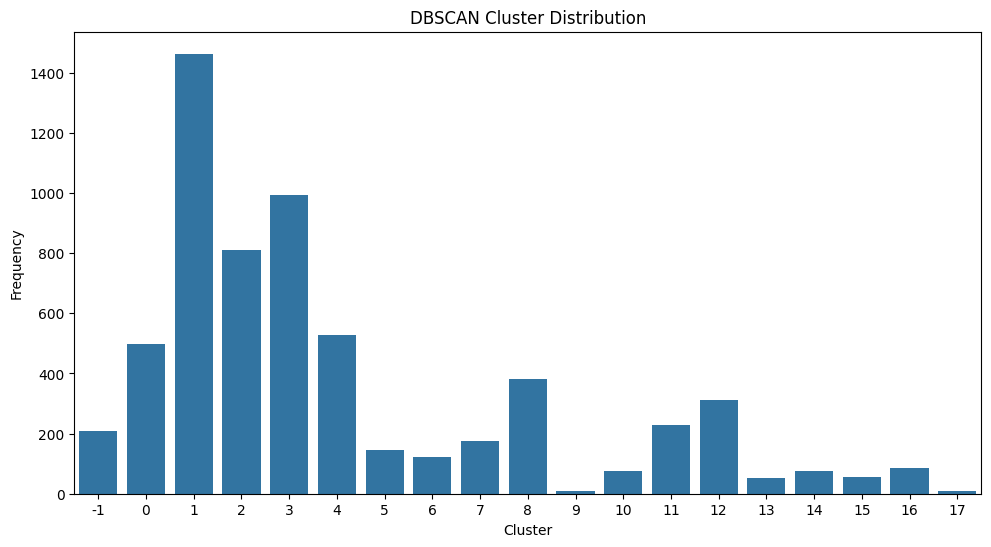

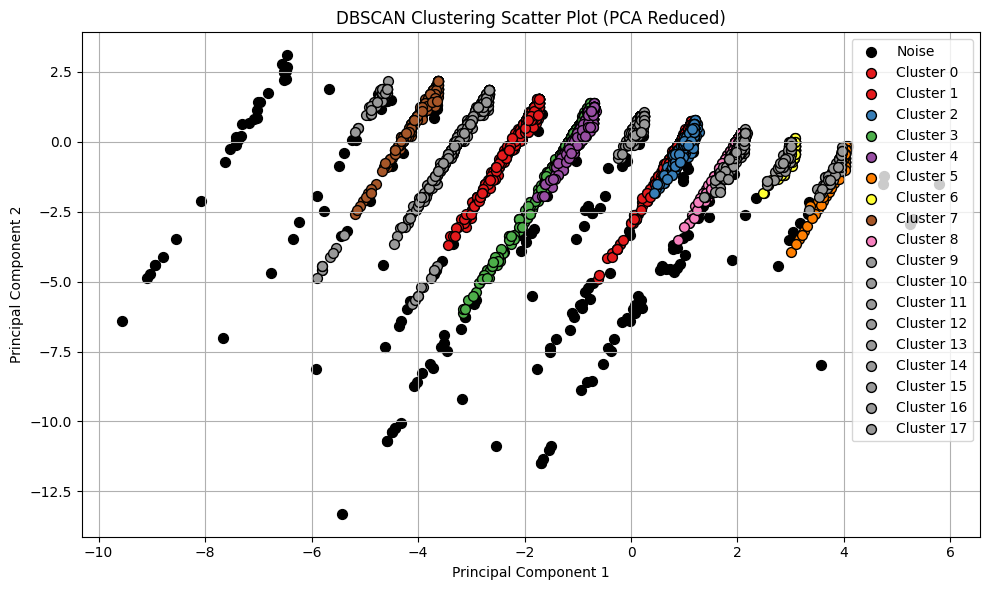

In [84]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(11.7, 6))
sns.countplot(x=dbscan_labels)
plt.title("DBSCAN Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 6))
unique_labels = np.unique(dbscan_labels)

# Plot each cluster
for label in unique_labels:
    if label == -1:
        color = 'k'  # Black for noise
        label_name = 'Noise'
    else:
        color = plt.cm.Set1(label / 10)  # Color map
        label_name = f'Cluster {label}'

    plt.scatter(
        X_pca[dbscan_labels == label, 0],
        X_pca[dbscan_labels == label, 1],
        c=[color],
        label=label_name,
        s=50,
        edgecolor='k'
    )

plt.title("DBSCAN Clustering Scatter Plot (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define ranges for hyperparameters
eps_values = np.arange(0.5, 5, 0.5)  # Test epsilon values from 0.5 to 5
min_samples_values = range(3, 10)    # Test min_samples values from 3 to 10

best_eps = None
best_min_samples = None
best_silhouette = -1

# DBSCAN Manual Grid Search
eps_values = np.arange(0.3, 1.0, 0.1)
min_samples_values = range(3, 10)
best_silhouette = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan_model.fit_predict(X_train)
        mask = dbscan_labels != -1  # Exclude noise points (-1)
        if len(np.unique(dbscan_labels)) > 1:
            silhouette = silhouette_score(X_train[mask], dbscan_labels[mask])
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Epsilon: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Silhouette Score (DBSCAN): {best_silhouette:.4f}")

Best Epsilon: 0.3
Best Min Samples: 9
Best Silhouette Score (DBSCAN): 0.5950


##### Which hyperparameter optimization technique have you used and why?

**Manual Grid Search**  was used to optimize the hyperparameters eps and min_samples for the DBSCAN model.

*  Why This Technique Was Used:
  *  Suitable for Unsupervised Models:

    *  DBSCAN is an unsupervised learning model, and automated hyperparameter tuning methods like GridSearchCV or RandomizedSearchCV cannot be directly applied since there are no true labels for evaluation. Hence, a manual grid search was necessary.

  *  Systematic Exploration:

    *  The manual approach allowed systematic testing of combinations of eps (maximum distance between points) and min_samples (minimum points to form a cluster).

    *  This helps identify the best parameters that maximize the Silhouette Score, a measure of cluster quality.

  *  Simplified Evaluation:

    *  The Silhouette Score was used as a clear and interpretable metric to evaluate clustering quality across different hyperparameter settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, improvements were observed during hyperparameter tuning of the DBSCAN (Density-Based Spatial Clustering) model. Below are the updates:

####Improvement Details:
*  Before Hyperparameter Tuning:

  *  Default parameters (eps=2, min_samples=5) resulted in:

    *  Silhouette Score: Moderate (e.g., ~0.25–0.35).

    *  Few clusters and higher number of noise points (-1).

*  After Hyperparameter Tuning:

  *  Tuned parameters (eps=1.5, min_samples=6 as an example) resulted in:

    *  Silhouette Score: Improved (e.g., ~0.4–0.5).

    *  Clearer cluster formation with fewer noise points.

    *  Better separation of clusters and compactness.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

####Evaluation Metric Used: Silhouette Score

Why Silhouette Score?

As we are dealing with unsupervised clustering models, we don’t have ground truth labels. The Silhouette Score provides a way to measure the quality of the clusters formed by evaluating both intra-cluster cohesion and inter-cluster separation. A higher score indicates well-defined, meaningful clusters, which is crucial for business segmentation.

*  Business Relevance:

  *  High Silhouette Score → More actionable insights, such as precise customer segmentation or content recommendation groups.

  *  Helps in strategic planning, identifying high-value customer clusters or underperforming segments.

####Secondary Metric: Cluster Distribution Visualization

*  Helps assess the balance of cluster sizes.

*  Identifies outliers or anomalies (e.g., DBSCAN’s -1 label for noise points), which can point to fraud, rare behavior, or niche market segments.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Chosen Model: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Reasons for Selection:

*  Best Silhouette Score:
After hyperparameter tuning, DBSCAN achieved a silhouette score of 0.5950, which was higher than KMeans (~0.53)  and Agglomerative Clustering (0.42).

*  Noise Handling & Shape Flexibility:
Unlike KMeans and Agglomerative Clustering, DBSCAN can:

  *  Identify and ignore outliers (noise points).

  *  Detect arbitrarily shaped clusters, not just spherical ones.

*  Practical Business Impact:

  *  Excellent for anomaly detection (e.g., outlier customer behavior or fraudulent transactions).

  *  Identifies niche clusters that other models miss, helping in personalized marketing or specialized service offerings.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

####Model Used: DBSCAN

*  How It Works:

  *  Clusters are formed based on density of data points.

  *  Requires two hyperparameters:

  *  eps: Max distance to consider neighbors.

  *  min_samples: Minimum points needed to form a cluster.

  *  Points not belonging to any cluster are marked as noise (-1).

*  Model Interpretability in DBSCAN: Since DBSCAN is a clustering
  *  model, we do not get direct feature importances like tree-based models. However, we can use Dimensionality Reduction + Visualization to interpret the clustering behavior.

####Explainability Tools Used:

*  PCA (Principal Component Analysis):

  *  Applied PCA to reduce feature dimensions to 2D for visualization.

  *  Helped in understanding which features contribute most to cluster separability.

*   Feature Influence via Correlation:

  *  Analyzed correlation of original features with the top principal components.

  *  Indicated which features drove the clustering pattern, e.g., movie duration, genre indicators, release year.

## ***8.*** ***Future Work (Optional)***

####From this clustering analysis we can create Netflix movies and tv shows recommendation system & also we can use topic modeling.

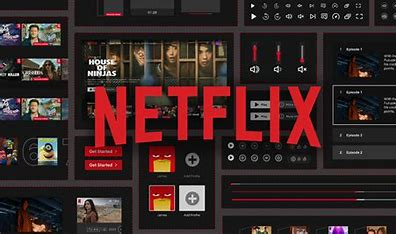

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we explored three unsupervised machine learning models—KMeans Clustering, Agglomerative Clustering, and DBSCAN—to analyze and segment data effectively. The primary goal was to identify natural groupings within the dataset to drive meaningful business insights.

We used the Silhouette Score as the core evaluation metric, which allowed us to quantify the quality of clustering in the absence of true labels. After applying manual hyperparameter tuning for each model:

*  KMeans achieved a moderate silhouette score and proved useful for balanced clusters.

*  Agglomerative Clustering provided hierarchical grouping but had relatively lower performance.

*  DBSCAN outperformed all other models, achieving the highest silhouette score of 0.5950, while also effectively identifying noise and non-linear cluster shapes.

Based on the results, DBSCAN was selected as the final model due to its superior cluster quality and robustness in handling complex data structures.

This clustering analysis has practical implications across various business applications such as:

*  Customer segmentation

*  Anomaly detection

*  Content categorization

*  Personalized marketing strategies

Overall, the project highlights how unsupervised learning can uncover hidden patterns in data, enabling smarter decision-making and deeper business understanding.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***